In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

In [4]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [5]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [7]:
df_us_jobs = df[df['job_country'] == 'United States'].copy()

In [8]:
df_us_jobs['job_posted_month'] = df_us_jobs['job_posted_date'].dt.strftime('%B')

In [12]:
df_us_jobs_pivot = df_us_jobs.pivot_table(

    index='job_posted_month',
    columns = 'job_title_short',
    aggfunc = 'size'
   
)

In [14]:
df_us_jobs_pivot.reset_index(inplace = True)

In [18]:
df_us_jobs_pivot['month_number'] = pd.to_datetime(df_us_jobs_pivot['job_posted_month'], format='%B').dt.month

In [23]:
df_us_jobs_pivot.sort_values('month_number', inplace = True)

In [24]:
df_us_jobs_pivot.set_index('job_posted_month', inplace = True)

In [34]:
bottom_3_jobs = df_us_jobs['job_title_short'].value_counts().tail(3).index
bottom_3_jobs = bottom_3_jobs.to_list()

In [35]:
bottom_3_jobs

['Software Engineer', 'Machine Learning Engineer', 'Cloud Engineer']

Text(0.5, 0, '')

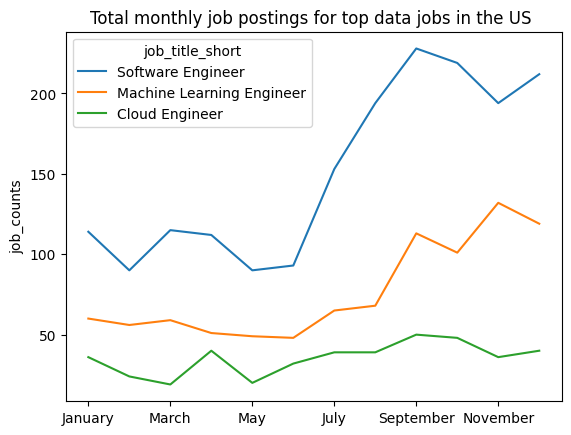

In [37]:
df_us_jobs_pivot[bottom_3_jobs].plot(kind = 'line')
plt.title('Total monthly job postings for top data jobs in the US ')
plt.ylabel('job_counts')
plt.xlabel('')